In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Performing some Preprocessing

df= pd.read_csv('netflix_titles.csv')

In [49]:
print(df.head())
df.info()


    show_id     type                                    title  \
0  81145628    Movie  Norm of the North: King Sized Adventure   
1  80117401    Movie               Jandino: Whatever it Takes   
2  70234439  TV Show                       Transformers Prime   
3  80058654  TV Show         Transformers: Robots in Disguise   
4  80125979    Movie                             #realityhigh   

                   director  \
0  Richard Finn, Tim Maltby   
1                       NaN   
2                       NaN   
3                       NaN   
4          Fernando Lebrija   

                                                cast  \
0  Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
1                                   Jandino Asporaat   
2  Peter Cullen, Sumalee Montano, Frank Welker, J...   
3  Will Friedle, Darren Criss, Constance Zimmer, ...   
4  Nesta Cooper, Kate Walsh, John Michael Higgins...   

                                    country         date_added  release_year  \
0  Un

In [50]:
df['director'] = df['director'].fillna('Unknown Director')
df['cast'] = df['cast'].fillna('Unknown Cast')
df['country'] = df['country'].fillna('Unknown Country')



In [51]:
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,Unknown Director,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,Unknown Director,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,Unknown Director,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
5,80163890,TV Show,Apaches,Unknown Director,"Alberto Ammann, Eloy Azorín, Verónica Echegui,...",Spain,"September 8, 2017",2016,TV-MA,1 Season,"Crime TV Shows, International TV Shows, Spanis...",A young journalist is forced into a life of cr...
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f..."
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,"September 8, 2017",2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...
8,80117902,TV Show,Fire Chasers,Unknown Director,Unknown Cast,United States,"September 8, 2017",2017,TV-MA,1 Season,"Docuseries, Science & Nature TV","As California's 2016 fire season rages, brave ..."
9,70304990,Movie,Good People,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","United States, United Kingdom, Denmark, Sweden","September 8, 2017",2014,R,90 min,"Action & Adventure, Thrillers",A struggling couple can't believe their luck w...


In [52]:
# df['date_added'] = pd.to_datetime(df['date_added'])
# df['year_added'] = df['date_added'].dt.year
# df['month_added'] = df['date_added'].dt.month
# df['month_name'] = df['date_added'].dt.strftime('%B')


 this error tells us that some date_added values have leading spaces or inconsistent formats like " September 9, 2018", which breaks the default date parser.

In [53]:
df['date_added'] = df['date_added'].str.strip()
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')


.str.strip() removes those pesky spaces like " September..." → "September..."

errors='coerce' tells pandas: if a date can’t be parsed, set it to NaT instead of crashing



In [54]:
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month
df['month_name'] = df['date_added'].dt.strftime('%B')


In [55]:
print(df['date_added'].isna().sum())


11


In [ ]:
print("Before:", len(df))
df = df[df['date_added'].notna()]
#or df = df.dropna(subset=['date_added']) can also be used
print("After:", len(df))


Before: 6234
After: 6223


In [58]:
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,month_name
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,2019.0,9.0,September
1,80117401,Movie,Jandino: Whatever it Takes,Unknown Director,Jandino Asporaat,United Kingdom,2016-09-09,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,2016.0,9.0,September
2,70234439,TV Show,Transformers Prime,Unknown Director,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2018-09-08,2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",2018.0,9.0,September
3,80058654,TV Show,Transformers: Robots in Disguise,Unknown Director,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2018-09-08,2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,2018.0,9.0,September
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,2017.0,9.0,September
5,80163890,TV Show,Apaches,Unknown Director,"Alberto Ammann, Eloy Azorín, Verónica Echegui,...",Spain,2017-09-08,2016,TV-MA,1 Season,"Crime TV Shows, International TV Shows, Spanis...",A young journalist is forced into a life of cr...,2017.0,9.0,September
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada",2017-09-08,2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f...",2017.0,9.0,September
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,2017-09-08,2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...,2017.0,9.0,September
8,80117902,TV Show,Fire Chasers,Unknown Director,Unknown Cast,United States,2017-09-08,2017,TV-MA,1 Season,"Docuseries, Science & Nature TV","As California's 2016 fire season rages, brave ...",2017.0,9.0,September
9,70304990,Movie,Good People,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","United States, United Kingdom, Denmark, Sweden",2017-09-08,2014,R,90 min,"Action & Adventure, Thrillers",A struggling couple can't believe their luck w...,2017.0,9.0,September


In [59]:
df['duration_int'] = df['duration'].str.extract('(\d+)').astype(float)
df['duration_type'] = df['duration'].str.extract('([a-zA-Z]+)')


In [60]:
df.head(20)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,month_name,duration_int,duration_type
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,2019.0,9.0,September,90.0,min
1,80117401,Movie,Jandino: Whatever it Takes,Unknown Director,Jandino Asporaat,United Kingdom,2016-09-09,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,2016.0,9.0,September,94.0,min
2,70234439,TV Show,Transformers Prime,Unknown Director,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2018-09-08,2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",2018.0,9.0,September,1.0,Season
3,80058654,TV Show,Transformers: Robots in Disguise,Unknown Director,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2018-09-08,2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,2018.0,9.0,September,1.0,Season
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,2017.0,9.0,September,99.0,min
5,80163890,TV Show,Apaches,Unknown Director,"Alberto Ammann, Eloy Azorín, Verónica Echegui,...",Spain,2017-09-08,2016,TV-MA,1 Season,"Crime TV Shows, International TV Shows, Spanis...",A young journalist is forced into a life of cr...,2017.0,9.0,September,1.0,Season
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada",2017-09-08,2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f...",2017.0,9.0,September,110.0,min
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,2017-09-08,2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...,2017.0,9.0,September,60.0,min
8,80117902,TV Show,Fire Chasers,Unknown Director,Unknown Cast,United States,2017-09-08,2017,TV-MA,1 Season,"Docuseries, Science & Nature TV","As California's 2016 fire season rages, brave ...",2017.0,9.0,September,1.0,Season
9,70304990,Movie,Good People,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","United States, United Kingdom, Denmark, Sweden",2017-09-08,2014,R,90 min,"Action & Adventure, Thrillers",A struggling couple can't believe their luck w...,2017.0,9.0,September,90.0,min


In [61]:
df['genre_list'] = df['listed_in'].str.split(', ')
df_exploded = df.explode('genre_list')


In [62]:
df['cast_split'] = df['cast'].str.split(', ')
df_cast = df.explode('cast_split')


In [64]:
df.head(20)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,month_name,duration_int,duration_type,genre_list,cast_split
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,2019.0,9.0,September,90.0,min,"[Children & Family Movies, Comedies]","[Alan Marriott, Andrew Toth, Brian Dobson, Col..."
1,80117401,Movie,Jandino: Whatever it Takes,Unknown Director,Jandino Asporaat,United Kingdom,2016-09-09,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,2016.0,9.0,September,94.0,min,[Stand-Up Comedy],[Jandino Asporaat]
2,70234439,TV Show,Transformers Prime,Unknown Director,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2018-09-08,2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",2018.0,9.0,September,1.0,Season,[Kids' TV],"[Peter Cullen, Sumalee Montano, Frank Welker, ..."
3,80058654,TV Show,Transformers: Robots in Disguise,Unknown Director,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2018-09-08,2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,2018.0,9.0,September,1.0,Season,[Kids' TV],"[Will Friedle, Darren Criss, Constance Zimmer,..."
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,2017.0,9.0,September,99.0,min,[Comedies],"[Nesta Cooper, Kate Walsh, John Michael Higgin..."
5,80163890,TV Show,Apaches,Unknown Director,"Alberto Ammann, Eloy Azorín, Verónica Echegui,...",Spain,2017-09-08,2016,TV-MA,1 Season,"Crime TV Shows, International TV Shows, Spanis...",A young journalist is forced into a life of cr...,2017.0,9.0,September,1.0,Season,"[Crime TV Shows, International TV Shows, Spani...","[Alberto Ammann, Eloy Azorín, Verónica Echegui..."
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada",2017-09-08,2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f...",2017.0,9.0,September,110.0,min,"[International Movies, Sci-Fi & Fantasy, Thril...","[Antonio Banderas, Dylan McDermott, Melanie Gr..."
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,2017-09-08,2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...,2017.0,9.0,September,60.0,min,[Stand-Up Comedy],[Fabrizio Copano]
8,80117902,TV Show,Fire Chasers,Unknown Director,Unknown Cast,United States,2017-09-08,2017,TV-MA,1 Season,"Docuseries, Science & Nature TV","As California's 2016 fire season rages, brave ...",2017.0,9.0,September,1.0,Season,"[Docuseries, Science & Nature TV]",[Unknown Cast]
9,70304990,Movie,Good People,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","United States, United Kingdom, Denmark, Sweden",2017-09-08,2014,R,90 min,"Action & Adventure, Thrillers",A struggling couple can't believe their luck w...,2017.0,9.0,September,90.0,min,"[Action & Adventure, Thrillers]","[James Franco, Kate Hudson, Tom Wilkinson, Oma..."


In [65]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 6223 entries, 0 to 6222
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   show_id        6223 non-null   int64         
 1   type           6223 non-null   object        
 2   title          6223 non-null   object        
 3   director       6223 non-null   object        
 4   cast           6223 non-null   object        
 5   country        6223 non-null   object        
 6   date_added     6223 non-null   datetime64[ns]
 7   release_year   6223 non-null   int64         
 8   rating         6214 non-null   object        
 9   duration       6223 non-null   object        
 10  listed_in      6223 non-null   object        
 11  description    6223 non-null   object        
 12  year_added     6223 non-null   float64       
 13  month_added    6223 non-null   float64       
 14  month_name     6223 non-null   object        
 15  duration_int   6223 non-nu

## Popular genre by month.


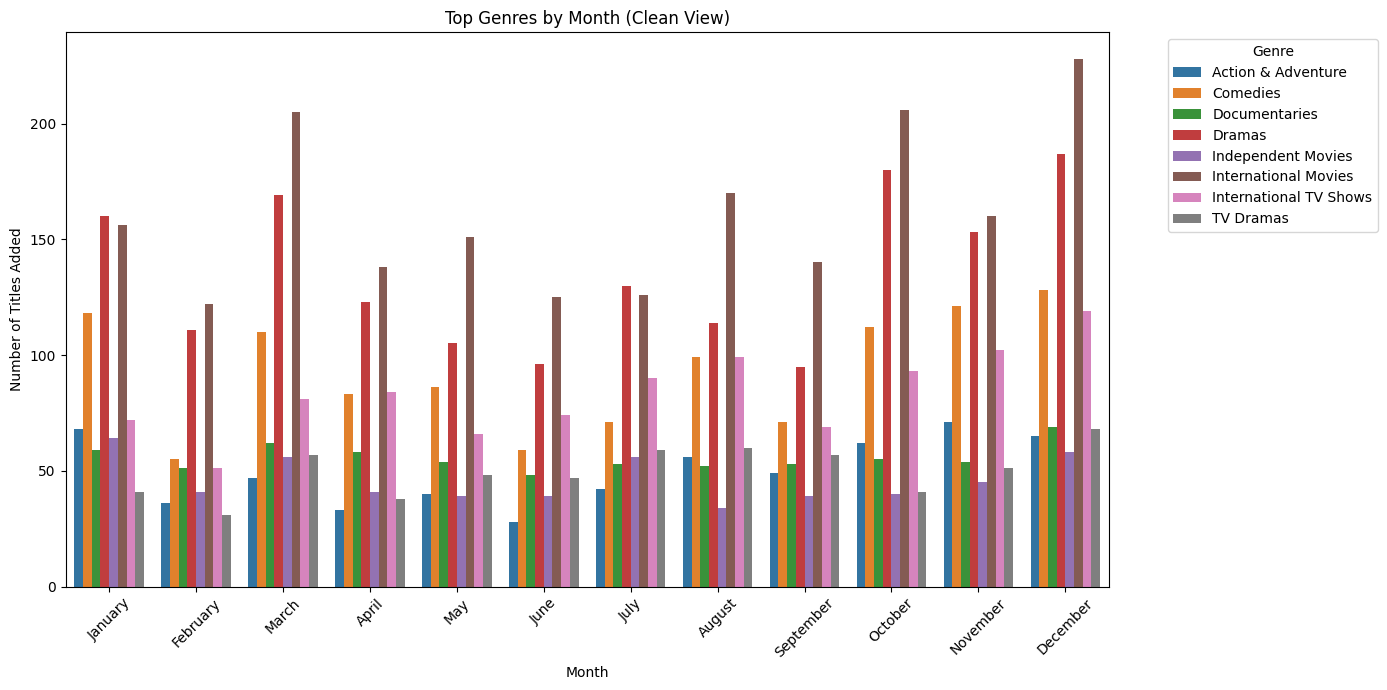

In [111]:



# Count genre by month
genre_month = df_exploded.groupby(['month_name', 'genre_list']).size().reset_index(name='count')

# Sort months properly
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
genre_month['month_name'] = pd.Categorical(genre_month['month_name'], categories=month_order, ordered=True)

# Optional: Limit to top genres overall to avoid clutter
top_genres = df_exploded['genre_list'].value_counts().nlargest(8).index
filtered = genre_month[genre_month['genre_list'].isin(top_genres)]

# Set color palette
# palette = sns.color_palette("tab10", n_colors=len(top_genres))

plt.figure(figsize=(14, 7))
sns.barplot(data=filtered, x='month_name', y='count', hue='genre_list', dodge=True)
plt.title('Top Genres by Month (Clean View)')
plt.xlabel('Month')
plt.ylabel('Number of Titles Added')
plt.xticks(rotation=45)
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## Number of Movies vs TV Shows Over the Years

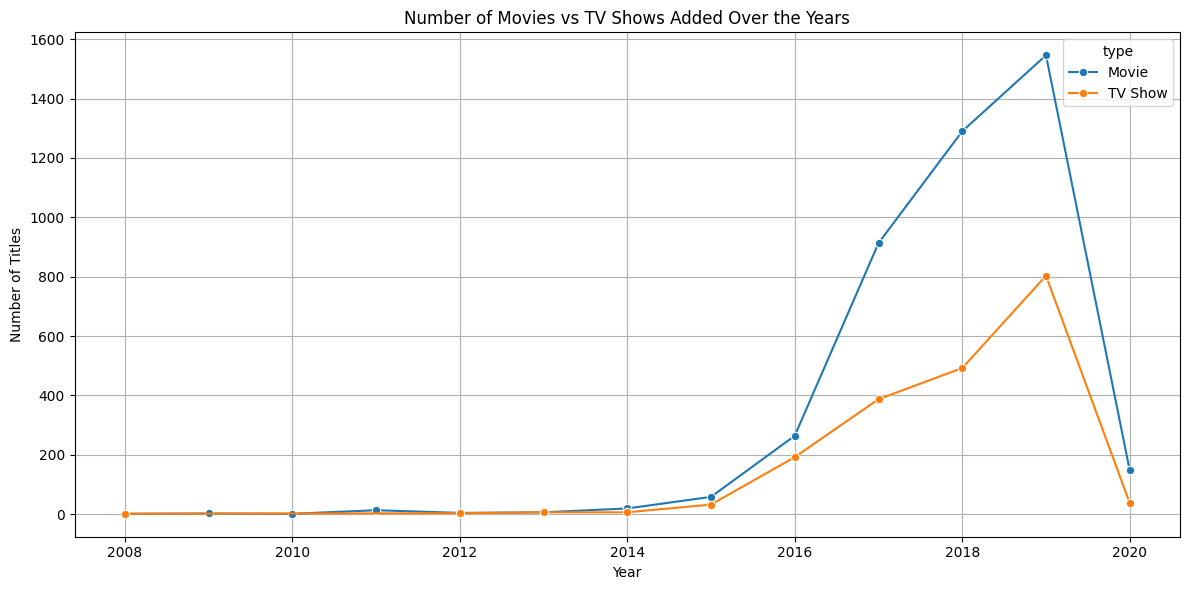

In [ ]:

# Group by year and type (Movie/TV Show)
type_year = df.groupby(['year_added', 'type']).size().reset_index(name='count')

# Drop years before 2008 (if needed) for cleaner plot
type_year = type_year[type_year['year_added'] >= 2008]

plt.figure(figsize=(12, 6))
sns.lineplot(data=type_year, x='year_added', y='count', hue='type', marker='o')
plt.title('Number of Movies vs TV Shows Added Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.tight_layout()
plt.show()


## Country-wise Content Distribution  1

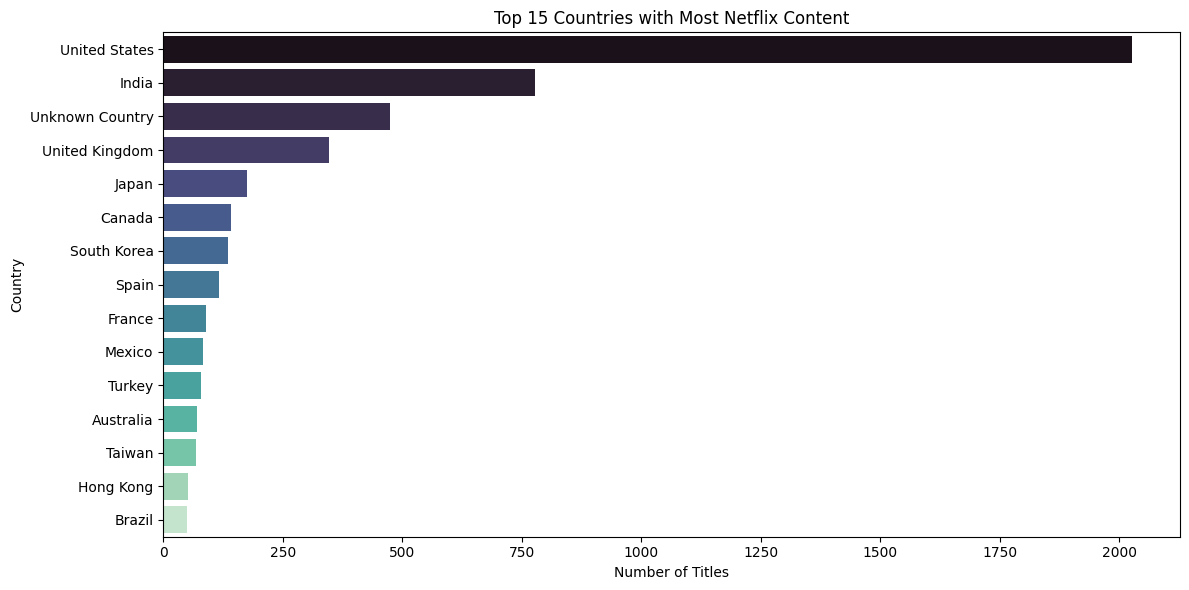

In [133]:
# Count total titles per country
country_counts = df['country'].value_counts().head(15).reset_index()
country_counts.columns = ['country', 'count']

plt.figure(figsize=(12, 6))
sns.barplot(data=country_counts, x='count', y='country', palette='mako',hue='country')
plt.title('Top 15 Countries with Most Netflix Content')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

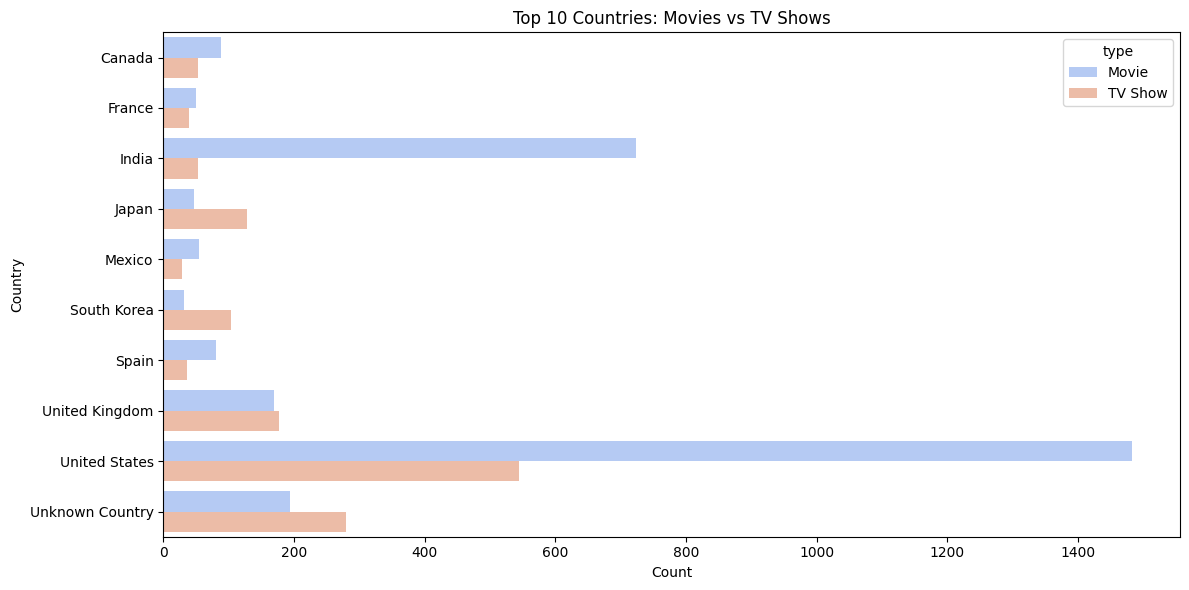

In [134]:
# Group by country and type
country_type = df.groupby(['country', 'type']).size().reset_index(name='count')

# Take top 10 countries for visualization
top_countries = df['country'].value_counts().head(10).index
country_type = country_type[country_type['country'].isin(top_countries)]

plt.figure(figsize=(12, 6))
sns.barplot(data=country_type, x='count', y='country', hue='type', palette='coolwarm')
plt.title('Top 10 Countries: Movies vs TV Shows')
plt.xlabel('Count')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


## Most Frequent Collaborations Between Directors and Actors

In [135]:
# Filter out unknown directors
df_simple = df[df['director'] != 'Unknown Director']

# Explode the cast list
df_simple = df_simple.explode('cast_split')

# Drop NaN actors
df_simple = df_simple.dropna(subset=['cast_split'])

# Count pairs
pair_counts = df_simple.groupby(['director', 'cast_split']).size().reset_index(name='count')

# Sort and take top 10
top_collabs = pair_counts.sort_values(by='count', ascending=False).head(10)

# Display
print(top_collabs)


              director        cast_split  count
23635   S.S. Rajamouli    Ramya Krishnan      7
23634   S.S. Rajamouli           Prabhas      7
23640   S.S. Rajamouli  Tamannaah Bhatia      7
23637   S.S. Rajamouli         Sathyaraj      7
23636   S.S. Rajamouli    Rana Daggubati      7
23632   S.S. Rajamouli    Anushka Shetty      7
23633   S.S. Rajamouli            Nassar      7
9437       Hakan Algül       Ata Demirer      6
6176      David Dhawan       Anupam Kher      5
16690  Martin Scorsese     Harvey Keitel      5


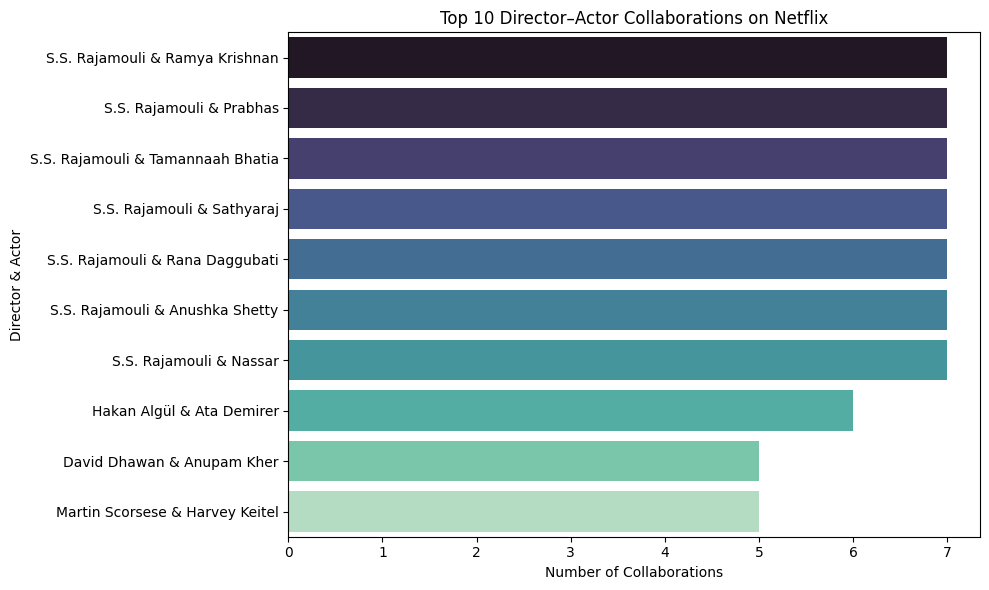

In [138]:
# Combine director and actor into a single string for readability
top_collabs['pair'] = top_collabs['director'] + ' & ' + top_collabs['cast_split']

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='pair', data=top_collabs, palette='mako',hue='pair')
plt.title('Top 10 Director–Actor Collaborations on Netflix')
plt.xlabel('Number of Collaborations')
plt.ylabel('Director & Actor')
plt.tight_layout()
plt.show()


## Genre Diversity by Country


/var/folders/nx/xxspfxy53bz4m64nw5z09_rh0000gn/T/ipykernel_60791/2388922575.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_diversity.values, y=genre_diversity.index, palette='plasma', )


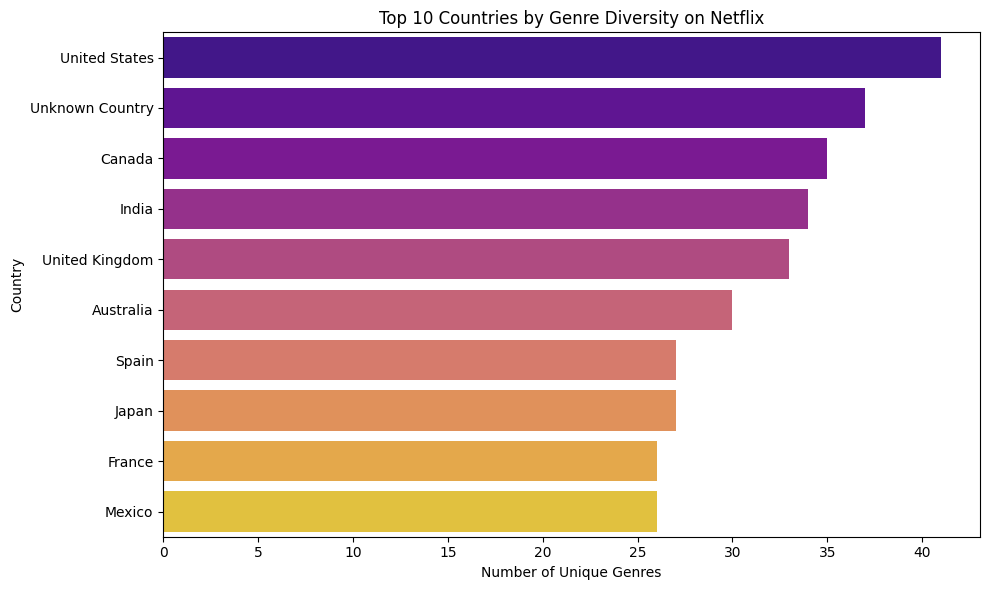

In [143]:
# Explode the genre list so each row has one genre
df_genre_country = df.explode('genre_list')

# Group by country and count unique genres
genre_diversity = df_genre_country.groupby('country')['genre_list'].nunique().sort_values(ascending=False).head(10)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_diversity.values, y=genre_diversity.index, palette='plasma', )
plt.title('Top 10 Countries by Genre Diversity on Netflix')
plt.xlabel('Number of Unique Genres')
plt.ylabel('Country')
plt.tight_layout()
plt.show()
